# Predicting Customer Default: A Data-Driven Approach

**Introduction:**

In this project, we aim to develop a predictive model to identify which customers are most likely to default on their loans. This is a part of **Purpose Financial Data Challenge** that wants to enhance its risk assessment processes. By accurately predicting loan defaults, the financial institution can make more informed lending decisions, minimize financial losses, and manage its credit portfolio more effectively.

To achieve this, we'll analyze a dataset provided by Purpose Financial that includes various customer and financial features. Our approach will be structured and systematic, involving several key steps:

- Data Cleaning: Handling missing values, outliers, and ensuring data consistency.
- Feature Engineering: Creating new features, transforming existing ones, and selecting the most relevant features.
- Model Building: Using machine learning algorithms such as logistic regression, decision trees, and ensemble methods.
- Evaluation: Assessing the model's performance using metrics like accuracy, precision, recall, and AUC-ROC.
- Implementation: Deploying the model for practical use and integrating it with the financial institution's systems.

We will leverage tools and libraries such as Python, Pandas, scikit-learn, and XGBoost to build and evaluate our predictive model.

**Summary of the results:**

The dataset is imbalanced, with 89.78% of instances belonging to the majority class (non-defaulters) and only 10.22% to the minority class (defaulters). For this binary classification task, we evaluated three main models: a logistic regression classifier, a gradient-boosted decision tree model using XGBoost, and a random forest classifier.

We focused on recall due to the significant class imbalance and the higher cost of false negatives compared to false positives. Higher recall is crucial to minimize false negatives, which directly reduces financial risk.

Among the three models, the Optimal XGBoost classifier performed the best in terms of recall, achieving approximately 78.9% recall compared to approximately 74.2% for the Optimal Logistic Regression model. Although the logistic regression model is simpler and more interpretable, the XGBoost model's decisions can be interpreted sufficiently through feature importances.

Therefore, our recommended model is the Optimal XGBoost classifier with a recall of approximately 78.9%.



In [1]:
# Importing necessary libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for statistical analysis
from scipy import stats

# Importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

# Importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Importing libraries for machine learning models

#Importing Isolation Forest
from sklearn.ensemble import IsolationForest

# Importing libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing logistic regression model
from sklearn.linear_model import LogisticRegression

# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Importing XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# Importing libraries for data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold

# Importing libraries for handling warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset
train_df=pd.read_csv('train.csv')

# Data Exploration

In [3]:
#print shape
print(train_df.shape)

(20839, 13)


In [4]:
# Display the first few rows of the dataset
print(train_df.head())

   id date_of_birth  number_dependants  credit_utilization  \
0   1    1993-03-14                  1            0.036495   
1   2    1966-09-27                  1            0.023423   
2   3    1931-01-11                  2            0.027205   
3   4    1953-01-07                  1            0.009141   
4   5    1943-11-17                  0            0.068424   

   debt_to_income_ratio  monthly_income  number_open_credit_lines  \
0              0.208897            2400                         6   
1              0.260438            2200                         6   
2              0.335922            3000                         6   
3              0.353779            2100                         2   
4              0.314966            2500                         2   

   number_open_loans  number_90_days_past_due  number_charged_off  score1  \
0                  2                        0                   0     570   
1                  1                        0             

In [5]:
# Display basic information about the dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20839 entries, 0 to 20838
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   date_of_birth             20839 non-null  object 
 2   number_dependants         20839 non-null  int64  
 3   credit_utilization        20839 non-null  float64
 4   debt_to_income_ratio      20839 non-null  float64
 5   monthly_income            20839 non-null  int64  
 6   number_open_credit_lines  20839 non-null  int64  
 7   number_open_loans         20839 non-null  int64  
 8   number_90_days_past_due   20839 non-null  int64  
 9   number_charged_off        20839 non-null  int64  
 10  score1                    20839 non-null  int64  
 11  score2                    20839 non-null  int64  
 12  target                    20839 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.1+ MB
Non

In [6]:
# Display summary statistics of the dataset
train_df.describe().T

count          mean          std           min  \
id                        20839.0  10923.946878  6295.585008  1.000000e+00   
number_dependants         20839.0      0.483421     0.719653 -1.000000e+00   
credit_utilization        20839.0      0.048159     0.045717  3.932283e-07   
debt_to_income_ratio      20839.0      0.333507     0.117332  2.938556e-02   
monthly_income            20839.0   2290.772110   320.090288  2.000000e+03   
number_open_credit_lines  20839.0      4.997745     2.248021  0.000000e+00   
number_open_loans         20839.0      2.027497     1.431671  0.000000e+00   
number_90_days_past_due   20839.0      0.098901     0.314963  0.000000e+00   
number_charged_off        20839.0      0.098901     0.315420  0.000000e+00   
score1                    20839.0    669.511637    98.005767  5.000000e+02   
score2                    20839.0    669.294400    98.607630  5.000000e+02   
target                    20839.0      0.102164     0.302871  0.000000e+00   

                                  25%           50%           75%  \
id                        5482.000000  10929.000000  16366.500000   
number_dependants            0.000000      0.000000      1.000000   
credit_utilization           0.014367      0.034783      0.067895   
debt_to_income_ratio         0.247782      0.325432      0.411210   
monthly_income            2100.000000   2200.000000   2400.000000   
number_open_credit_lines     3.000000      5.000000      6.000000   
number_open_loans            1.000000      2.000000      3.000000   
number_90_days_past_due      0.000000      0.000000      0.000000   
number_charged_off           0.000000      0.000000      0.000000   
score1                     584.000000    669.000000    755.000000   
score2                     583.000000    670.000000    754.000000   
target                       0.000000      0.000000      0.000000   

                                   max  
id                        21839.000000  
number_dependants             6.000000  
credit_utilization            0.538702  
debt_to_income_ratio          0.801838  
monthly_income             5000.000000  
number_open_credit_lines     15.000000  
number_open_loans             9.000000  
number_90_days_past_due       3.000000  
number_charged_off            3.000000  
score1                      839.000000  
score2                      839.000000  
target                        1.000000

# **Exploratory Data Analysis**

In [7]:
# Check for missing values
print(train_df.isnull().sum())

id                          0
date_of_birth               0
number_dependants           0
credit_utilization          0
debt_to_income_ratio        0
monthly_income              0
number_open_credit_lines    0
number_open_loans           0
number_90_days_past_due     0
number_charged_off          0
score1                      0
score2                      0
target                      0
dtype: int64


**Initial Observations:**
- The dataset has 20839 rows and 13 columns.
- The dataset appears to be well-structured with no missing values.
- The date_of_birth column may need to be converted to a datetime format for any date-related analysis.
- The dataset contains a mix of demographic and financial metrics with some potential data quality issues (e.g., negative values in number_dependants).

In [8]:
train_df['number_dependants'] = train_df['number_dependants'].where(train_df['number_dependants'] >= 0, 0)

**Data Dictionary:**

|Column| Data Type | Description |
|------|-----------|--------------|
|id | Integer | Unique identifier for each customer.|
|date_of_birth | Object | Customers date of birth. Used to calculate the age of the customer.|
|number_dependants | Integer | Number of dependents the customer has.|
|credit_utilization | Float | Proportion of available credit that the customer is using, expressed as a decimal.|
|debt_to_income_ratio | Float | Ratio of the customers total monthly debt payments to their gross monthly income.|
|monthly_income | Integer | Customers gross monthly income in dollars.|
|number_open_credit_lines| Integer | Number of open credit lines (e.g., credit cards) that the customer has.|
|number_open_loans | Integer | Number of open loans (e.g., personal loans, auto loans) that the customer has.|
|number_90_days_past_due | Integer | Number of times the customer has been 90 days or more past due on a payment.|
|number_charged_off | Integer | Number of loans that have been charged off due to non-payment.|
|score1 | Integer | Customers credit score from the first scoring system(e.g., FICO, Experian, Transunion, etc.|
|score2 | Integer | Customers credit score from the second scoring system.|
|target | Integer | Binary indicator of whether the customer has defaulted on a loan (1 = default, 0 = no default).|

**Implications:**

Credit Risk: The distribution of credit utilization, debt-to-income ratio, and credit scores can help in assessing the credit risk of customers. High credit utilization, high debt-to-income ratios, and low credit scores are indicators of higher credit risk.

Loan Management: The number of open credit lines and loans can provide insights into the customers' credit management behaviors. Multiple open credit lines and loans might indicate higher financial obligations and potential risk.

Payment Behavior: The number of 90 days past due and charged-off loans highlight the payment behaviors of customers. Frequent delays and charge-offs are strong indicators of financial distress and higher default risk.

Income Levels: The monthly income distribution provides context for the customers' ability to repay loans. Lower-income customers might be at a higher risk of default, especially if they have high debt-to-income ratios.



In [9]:
#Check for duplicates
duplicate_rows = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
# Frequency distribution of the 'target' variable
print("\nFrequency Distribution of Target Variable:")
target_distribution=train_df['target'].value_counts(normalize=True)*100
print(target_distribution)


Frequency Distribution of Target Variable:
0    89.783579
1    10.216421
Name: target, dtype: float64


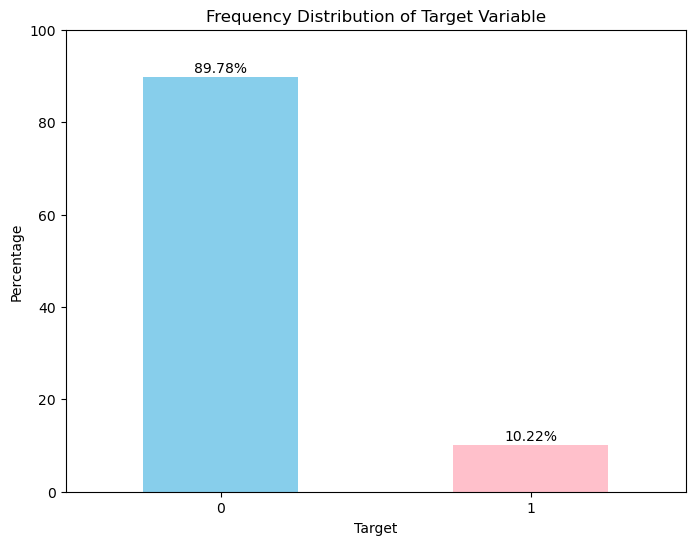

In [11]:
# Visualize the frequency distribution
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Frequency Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim([0, 100])

# Adding percentage labels on top of the bars
for index, value in enumerate(target_distribution):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.show()

**Insights and Implications:**
1. The target variable's imbalance highlights the need for careful handling during modeling to avoid biased predictions. From the frequency Distribution of the Target Variable:  
* 89.78% of the customers have not defaulted on their loans (target = 0).
* 10.22% of the customers have defaulted on their loans (target = 1).
* This indicates a significant class imbalance in the dataset.
2. There are no missing values in the dataset. This simplifies the data preprocessing steps as no imputation or removal of rows/columns is needed.


**Class Imbalance:** The significant class imbalance (majority non-defaulters) means that special care must be taken during model training to ensure that the model does not become biased towards predicting the majority class. 

**Data Quality:** The absence of missing values suggests that the dataset is complete and of good quality, which will help in building a more reliable model.

## Feature Engineering- Age from Date of birth:

In [12]:
#Convert Date Of Birth column to Age
train_df['date_of_birth'] = pd.to_datetime(train_df['date_of_birth'])
train_df['age'] = (pd.to_datetime('today') - train_df['date_of_birth']).dt.days // 365
train_df.drop('date_of_birth', axis=1, inplace=True)

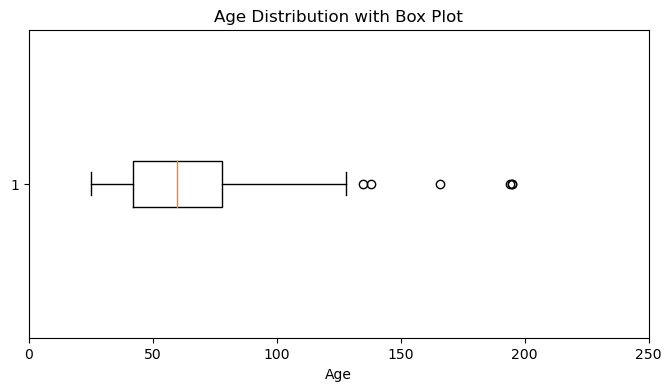

In [13]:
# Plotting age distribution
plt.figure(figsize=(8, 4))
plt.boxplot(train_df['age'], vert=False)
plt.title('Age Distribution with Box Plot')
plt.xlabel('Age')
plt.xlim(0, 250)
plt.show()

In [14]:
train_df['age'].agg(['min', 'max'])

min     25
max    195
Name: age, dtype: int64

The age data includes values up to 195 years, which seems unrealistic. To address this, we should filter out the outliers before plotting the distribution. This will remove extreme age values and provide a clearer, more accurate representation of the age distribution.

In [15]:
# Set a reasonable upper limit for age and filter the DataFrame
max_age = 100
train_df = train_df.loc[train_df['age'] <= max_age]

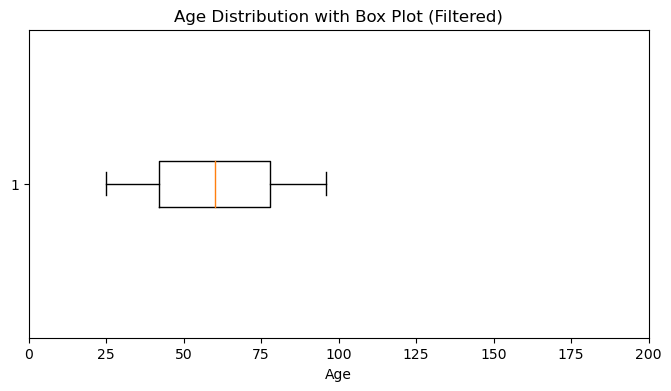

In [16]:
# Plotting age distribution after filtering
plt.figure(figsize=(8, 4))
plt.boxplot(train_df['age'], vert=False)
plt.title('Age Distribution with Box Plot (Filtered)')
plt.xlabel('Age')
plt.xlim(0, 200)
plt.show()

### Pairplot

CPU times: user 1min 18s, sys: 7.28 s, total: 1min 26s
Wall time: 1min 30s


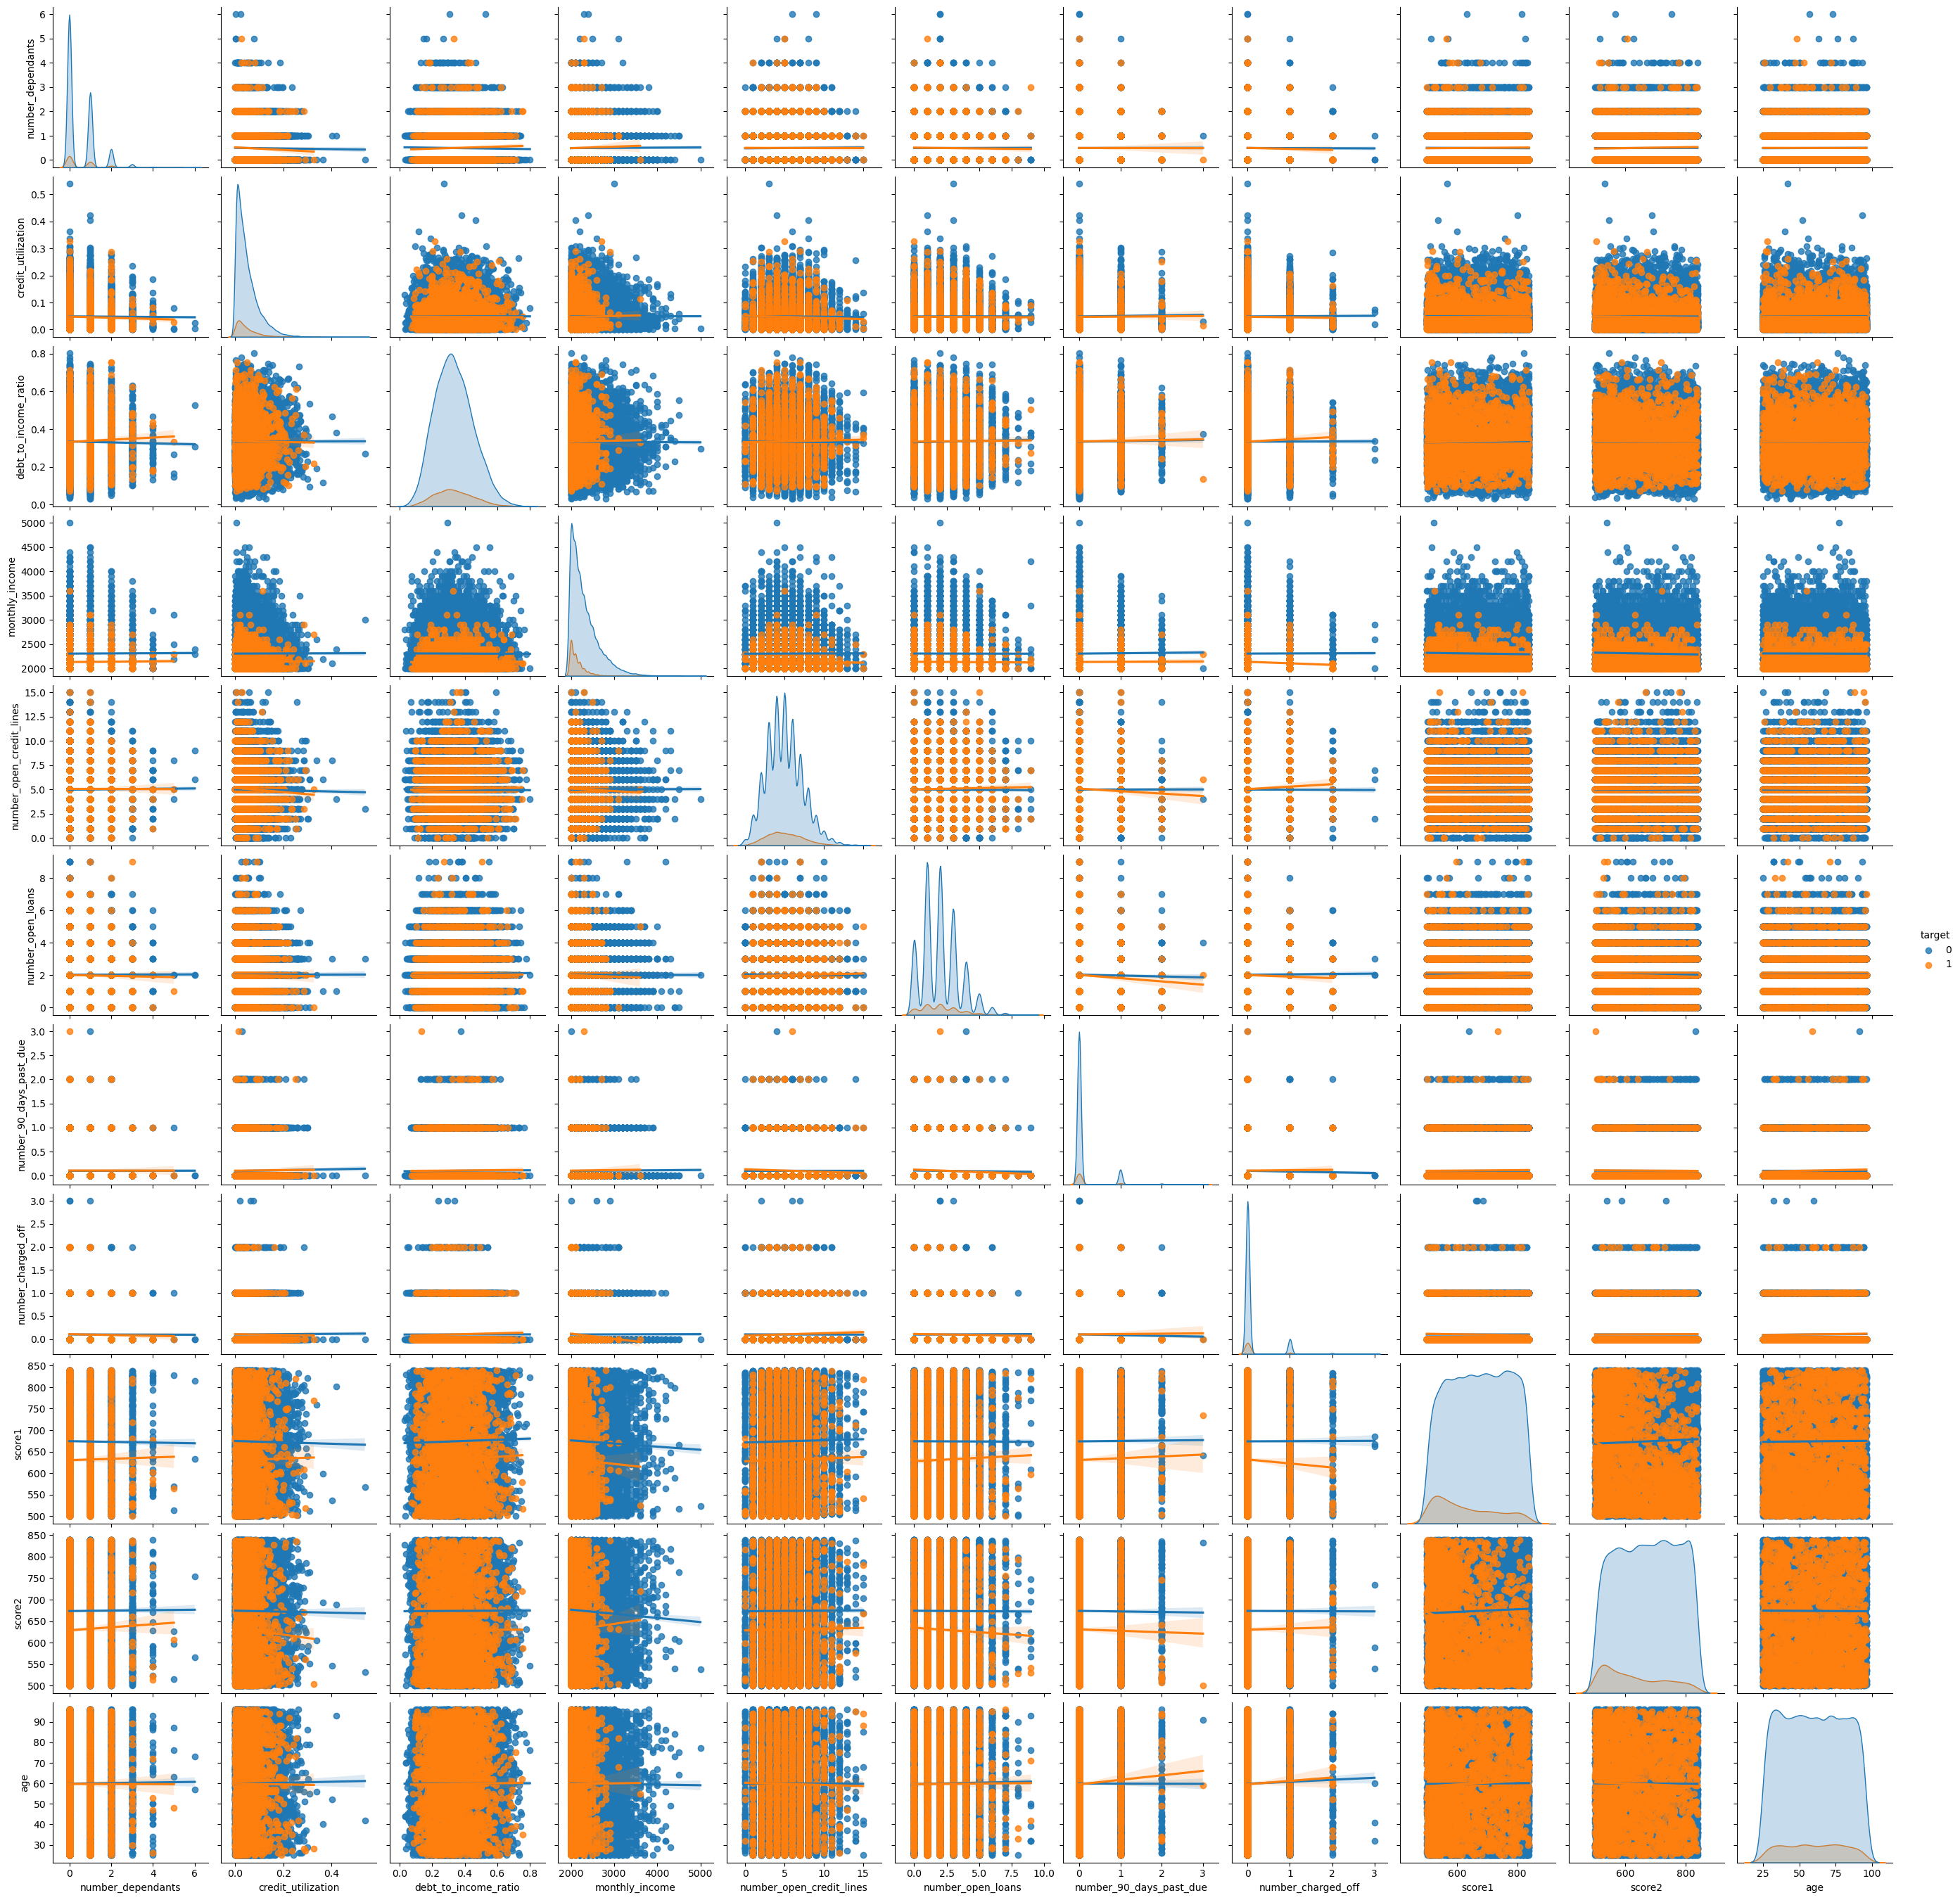

In [17]:
%%time
sns.pairplot(train_df.drop(columns = ['id']), hue='target', kind='reg') #drop the id column and create the pair plot

**Insights:**
- There is no strong linear separation between the target classes across most variable pairs.
- Many pairs of variables appear to be independent or weakly correlated, as indicated by the horizontal regression lines.
- Credit utilization and debt-to-income ratios are within expected ranges but do not show strong relationships with other variables.
- The points are spread across the plot, suggesting that there is no strong linear correlation between score1 and score2

### Outliers:

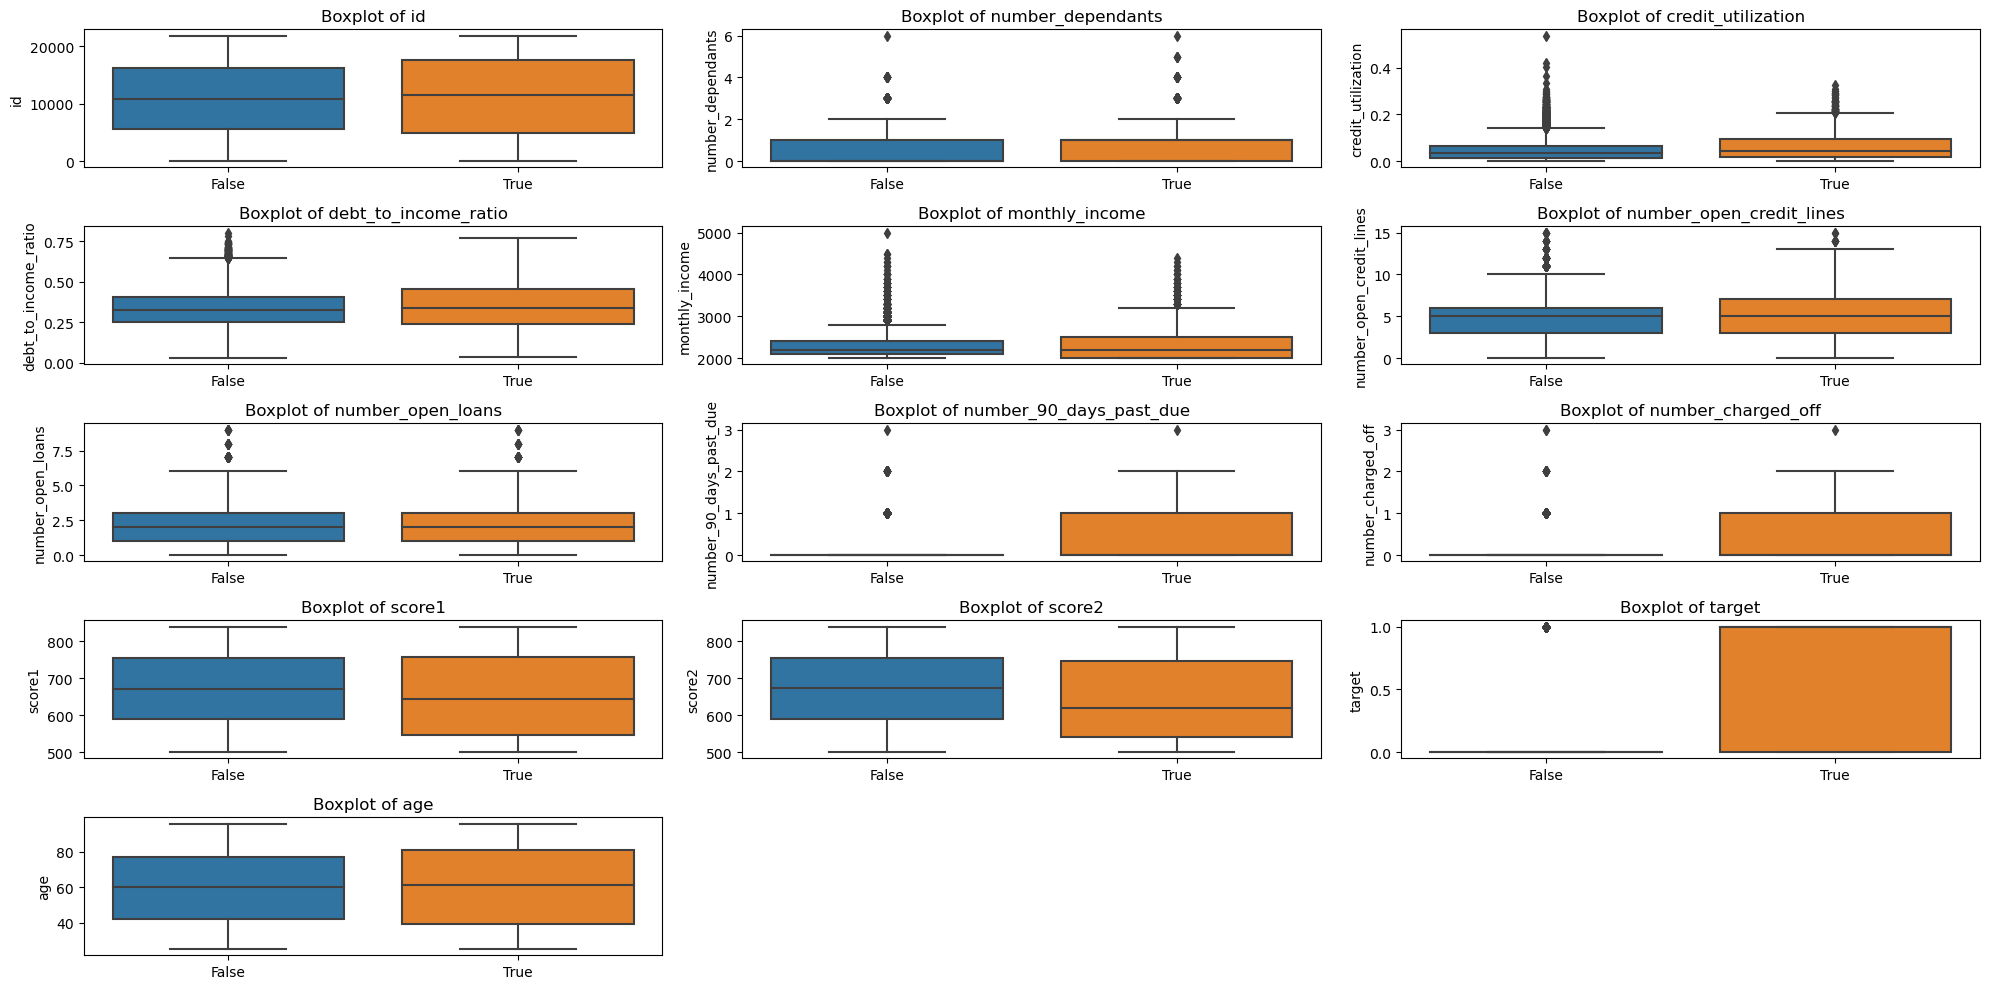

In [18]:
# Identify numerical columns
numerical_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Isolation Forest Algorithm for outlier detection
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(train_df[numerical_columns])
outlier_labels = clf.predict(train_df[numerical_columns])

# Convert the outlier labels: 1 for normal, -1 for outlier
outliers = outlier_labels == -1

# Visualizing Outliers using Boxplots
plt.figure(figsize=(20, 10))
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + 1

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=train_df[col], x=outliers)
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

### Correlation Matrix

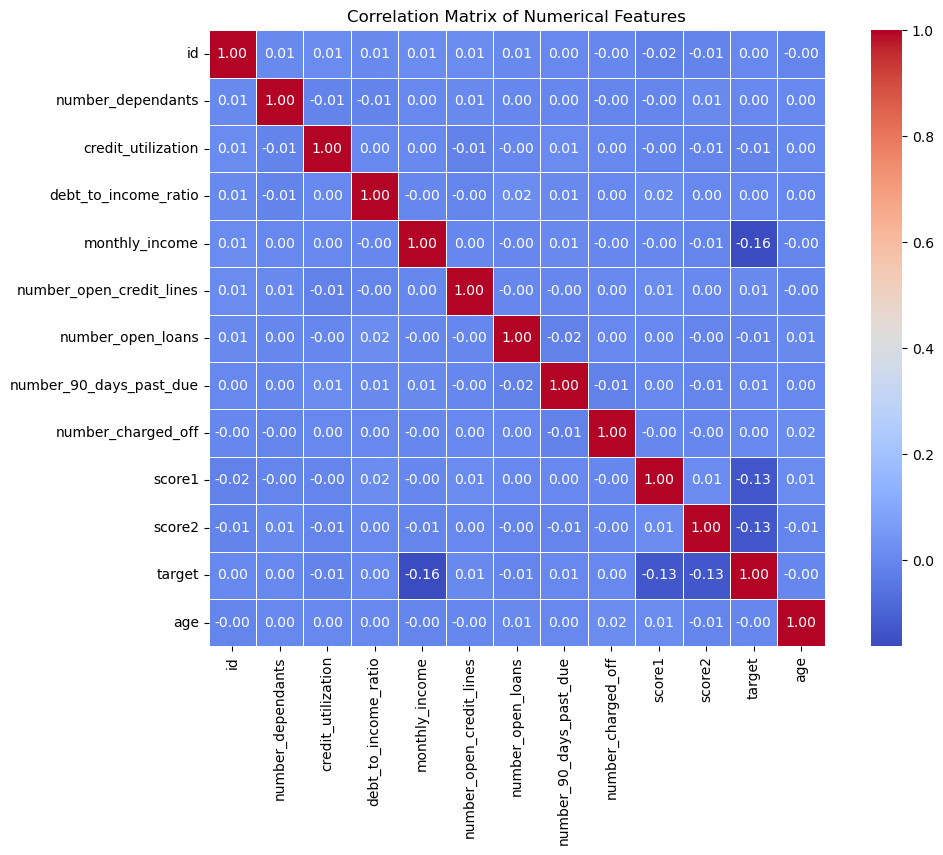

In [19]:
# Calculate the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

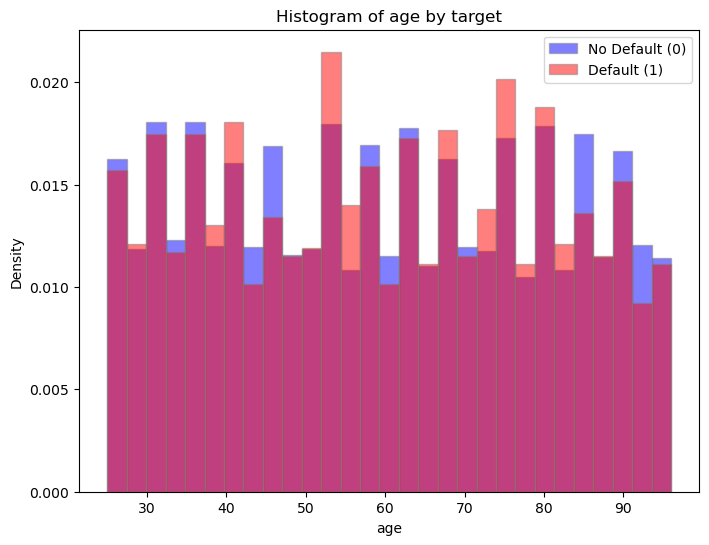

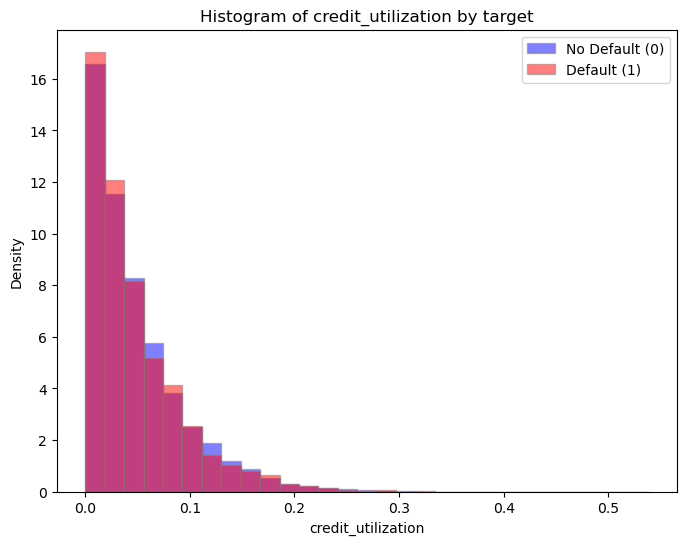

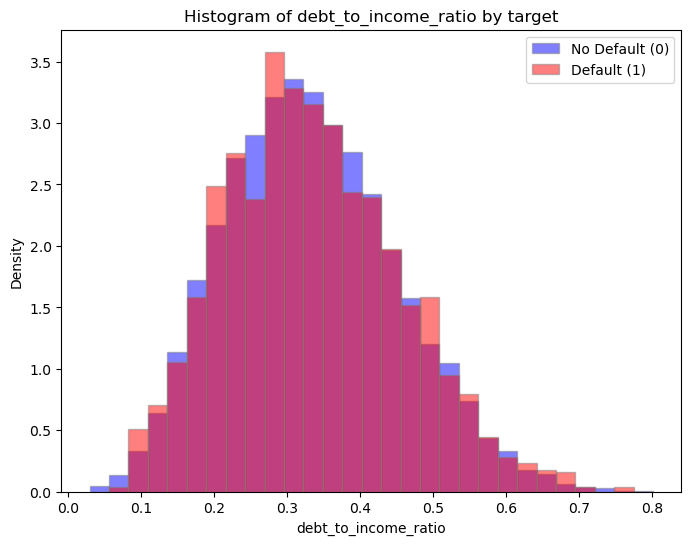

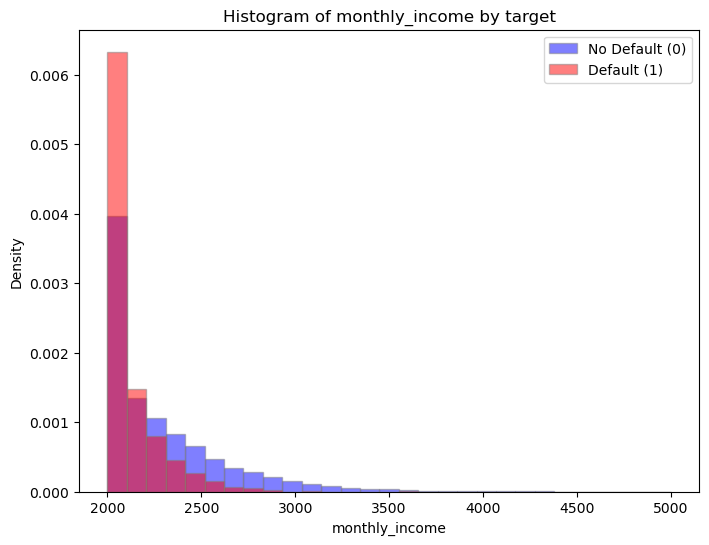

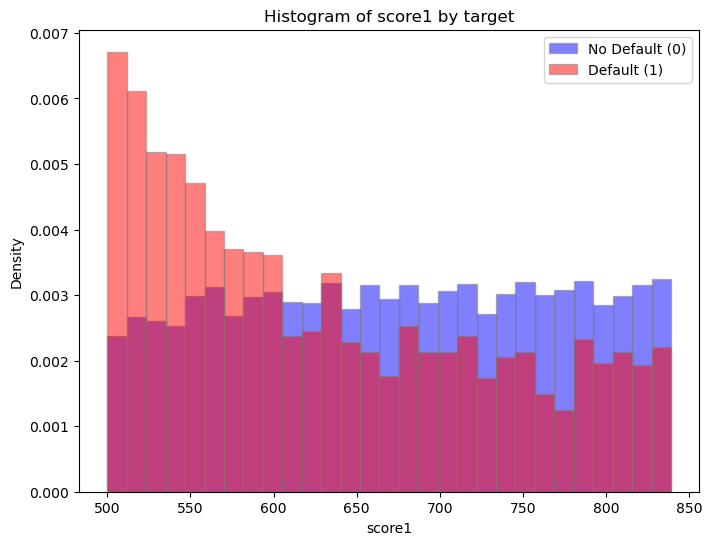

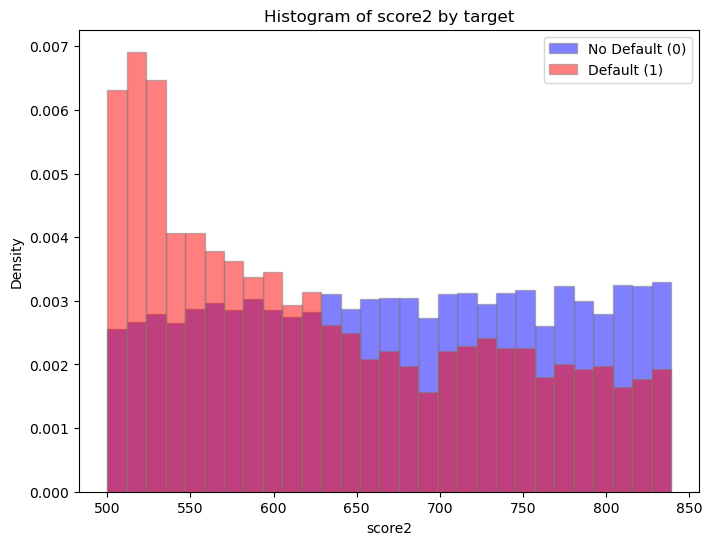

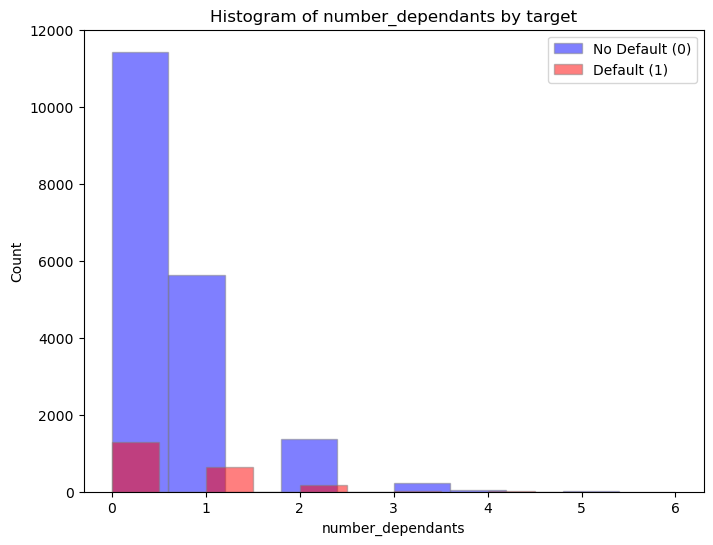

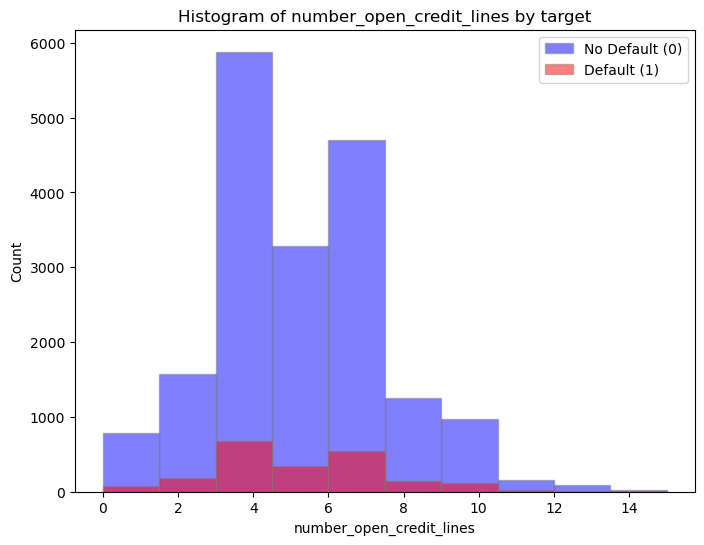

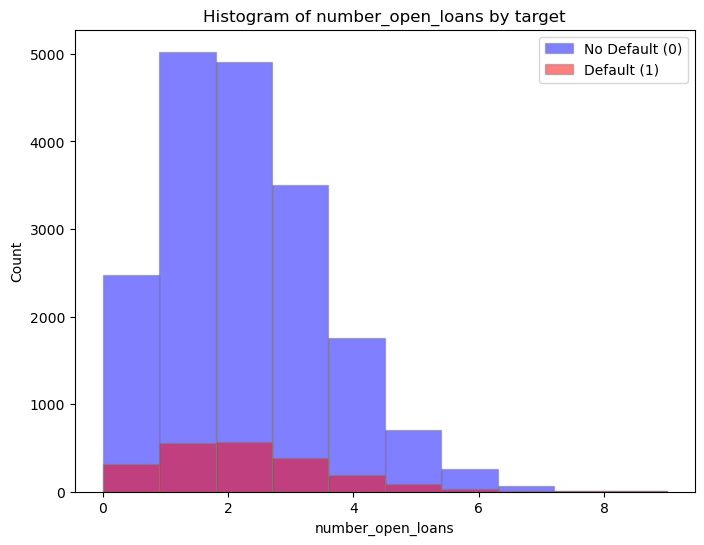

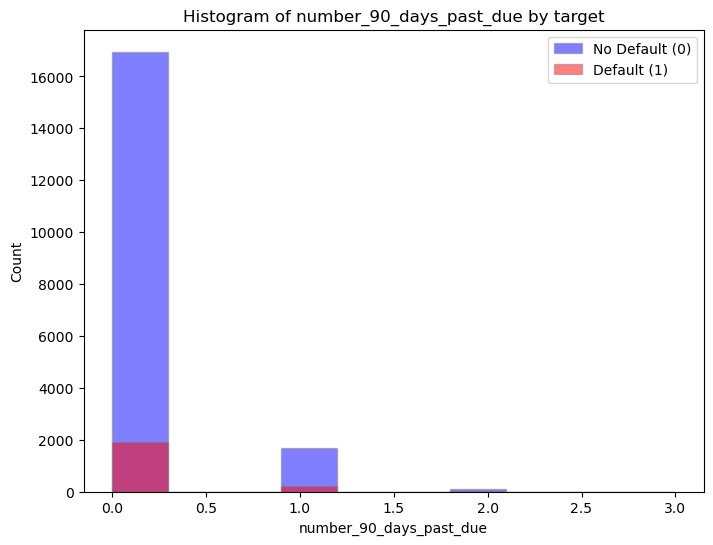

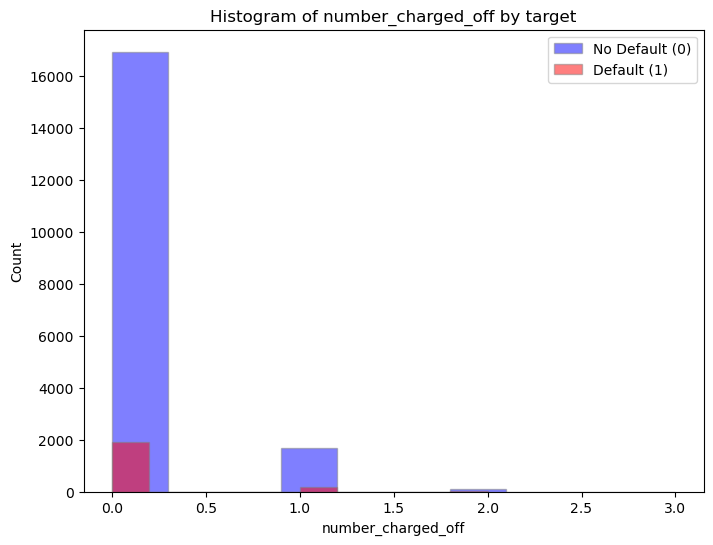

In [20]:
#Histograms Comparing Feature Distributions for Default and Non-Default

# List of columns
all_cols = ['age', 'credit_utilization', 'debt_to_income_ratio', 'monthly_income', 
            'score1', 'score2', 'number_dependants', 'number_open_credit_lines', 
            'number_open_loans', 'number_90_days_past_due', 'number_charged_off']
target_var = 'target'

# Generate histograms for all columns
for col in all_cols:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # Define bins 
    if col in ['age', 'credit_utilization', 'debt_to_income_ratio', 'monthly_income', 'score1', 'score2']:
        bins = np.linspace(np.nanmin(train_df[col]), np.nanmax(train_df[col]), 30)
        density = True
    else:
        bins = None
        density = False
    
    # Plot histograms for target=0 and target=1
    ax.hist(train_df[train_df[target_var] == 0][col], bins=bins, alpha=0.5, label='No Default (0)', color='blue', edgecolor='grey', density=density)
    ax.hist(train_df[train_df[target_var] == 1][col], bins=bins, alpha=0.5, label='Default (1)', color='red', edgecolor='grey', density=density)
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Density' if density else 'Count')
    ax.set_title(f'Histogram of {col} by {target_var}')
    ax.legend()

    # Display plot
    plt.show()


**Overall Insights:**
- Most features exhibit very weak correlations with each other, indicating that they provide unique, independent information about the dataset.
- monthly_income and credit scores (score1 and score2) have the strongest correlations with the target variable, though still weak. This suggests they may be somewhat useful in predicting financial outcomes but are not strongly determinative on their own.
- Lower monthly income is associated with a higher likelihood of default.
- Lower credit scores are associated with a higher likelihood of default.

We have already created age as a feature. Now, we will introduce several new features, each meticulously designed to enhance the modeling process and ensure that critical aspects of the data are effectively represented. The newly created features are:

- Income per Dependent: This feature calculates the monthly income available per dependent. A lower value indicates more dependents relative to income, suggesting higher financial pressure on the individual.
- Monthly_income_squared: This feature squares the monthly income to capture non-linear effects of income.
- Income and Score1 Interaction: Captures the combined effect of income level and the first credit score on the likelihood of default.
- Income and Score2 Interaction: Captures the combined effect of income level and the second credit score on the likelihood of default.
- Score Average: This feature averages the two credit scores (score1 and score2) to provide a single metric representing the individual's overall creditworthiness.
- Income and Credit Utilization Interaction: This interaction feature multiplies monthly income by credit utilization, capturing the combined effect of income level and credit usage. This feature can highlight scenarios where high income is offset by high credit utilization, indicating potential financial risk.

## Feature Engineering

In [21]:
#creating new features #Feature Engineering
train_df['income_per_dependent'] = train_df['monthly_income'] / (train_df['number_dependants'] + 1)  # +1 to avoid division by zero
train_df['monthly_income_squared'] = train_df['monthly_income'] ** 2
train_df['income_score1_interaction'] = train_df['monthly_income'] * train_df['score1']
train_df['income_score2_interaction'] = train_df['monthly_income'] * train_df['score2']
train_df['score_average'] = (train_df['score1'] + train_df['score2'])/2
train_df['income_utilization_interaction'] = train_df['monthly_income'] * train_df['credit_utilization']

In [22]:
train_df.head()

id  number_dependants  credit_utilization  debt_to_income_ratio  \
0   1                  1            0.036495              0.208897   
1   2                  1            0.023423              0.260438   
2   3                  2            0.027205              0.335922   
3   4                  1            0.009141              0.353779   
4   5                  0            0.068424              0.314966   

   monthly_income  number_open_credit_lines  number_open_loans  \
0            2400                         6                  2   
1            2200                         6                  1   
2            3000                         6                  1   
3            2100                         2                  4   
4            2500                         2                  3   

   number_90_days_past_due  number_charged_off  score1  score2  target  age  \
0                        0                   0     570     817       0   31   
1                        0                   0     741     756       0   57   
2                        0                   1     805     779       0   93   
3                        0                   0     573     829       0   71   
4                        0                   0     833     629       0   80   

   income_per_dependent  monthly_income_squared  income_score1_interaction  \
0                1200.0                 5760000                    1368000   
1                1100.0                 4840000                    1630200   
2                1000.0                 9000000                    2415000   
3                1050.0                 4410000                    1203300   
4                2500.0                 6250000                    2082500   

   income_score2_interaction  score_average  income_utilization_interaction  
0                    1960800          693.5                       87.587214  
1                    1663200          748.5                       51.529634  
2                    2337000          792.0                       81.615785  
3                    1740900          701.0                       19.197130  
4                    1572500          731.0                      171.060056

In [23]:
# Replace infinite values with NaN
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the median of each column #Median imputation technique
train_df.fillna(train_df.median(), inplace=True)

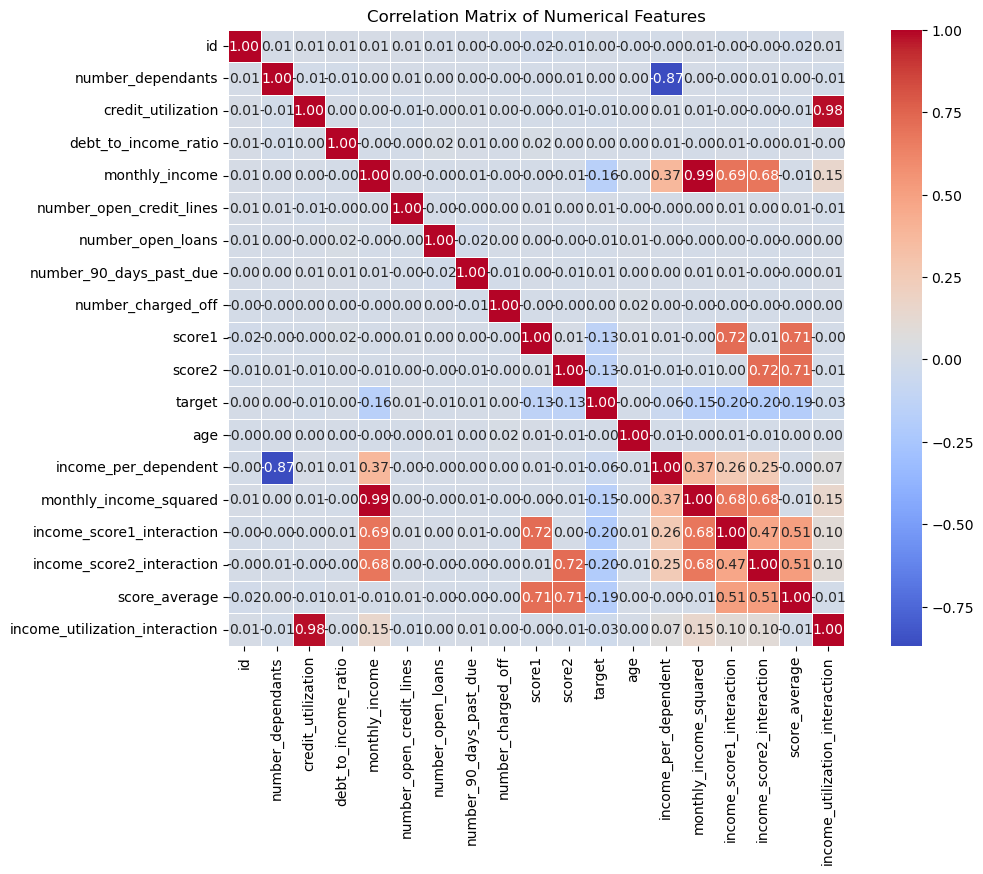

In [24]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The newly created features have significantly increased the correlations among several variables, highlighting the impact of effective feature engineering. This increase in correlation indicates that the new features are capturing essential relationships within the data, which were not previously evident. Specifically, features such as score_average, income_score1_interaction, income_score2_interaction, and monthly_income_squared have shown a stronger (negative) correlation with the target variable, suggesting they are more informative for predicting defaults.

In [25]:
# Check the distribution of the target variable
train_df['target'].value_counts()

0    18704
1     2128
Name: target, dtype: int64

## **Data Preparation** -  Train Test Splitting

In [26]:
#Seperating dependant and independant variabales
X = train_df[(list(i for i in list(train_df.describe(include='all').columns) if i != 'target'))]
y = train_df['target']


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [27]:
X_train.shape

(16665, 18)

In [28]:
X_test.shape

(4167, 18)

## Handling Class Imbalance

As we have seen, we have an imbalanced dataset. So, we will employ SMOTE (Synthetic Minority Oversampling Technique) to address this issue effectively.

In [29]:
smote = SMOTE()

print('Original unbalanced dataset shape',  len(y_train), y_train.value_counts())

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train[(i for i in list(X_train.describe(include='all').columns) if i!='target')], y_train)

print('Resampled balanced dataset shape',  len(y_smote), y_smote.value_counts())

Original unbalanced dataset shape 16665 0    14963
1     1702
Name: target, dtype: int64
Resampled balanced dataset shape 29926 0    14963
1    14963
Name: target, dtype: int64


In [30]:
# Displaying the shape of the resampled training set
print(f"X_smote shape: {X_smote.shape}")
print(f"y_smote shape: {y_smote.shape}")

X_smote shape: (29926, 18)
y_smote shape: (29926,)


# Data Transformation

The StandardScaler is used to standardize the features by removing the mean and scaling to unit variance. This transformation is applied to both the SMOTE-balanced training data (X_smote) and the test data (X_test) to ensure consistent scaling across all features, which helps improve the performance of machine learning models.

In [31]:
# Standardizing the data using StandardScaler
X_smote = scaler.fit_transform(X_smote)
X_test = scaler.transform(X_test)

# Model Implementation


## **Evaluation Metric**

We focused on **Recall** due to:

- Class Imbalance: Metrics like accuracy and AUC can be misleading due to the dataset's 90/10 imbalance.
- Cost of Errors: The cost of a false negative (approving a loan for a defaulter) is significantly higher than a false positive (denying a loan to a non-defaulter). Therefore, higher recall minimizes the financial risk of false negatives.

To address the class imbalance in the dataset and ensure robust predictive performance, we have already applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data. Following this preprocessing step, we will evaluate three different machine learning models: Logistic Regression, Gradient Boosted Decision Trees using XGBoost, and Random Forest Classifier.

## Baseline-XGBoost

The precision on test data is  0.172
The recall on test data is  0.556
The f1 on test data is  0.263
The ROC AUC on test data is  0.682
The AUC-PR on test data is  0.183
[[2604 1137]
 [ 189  237]]


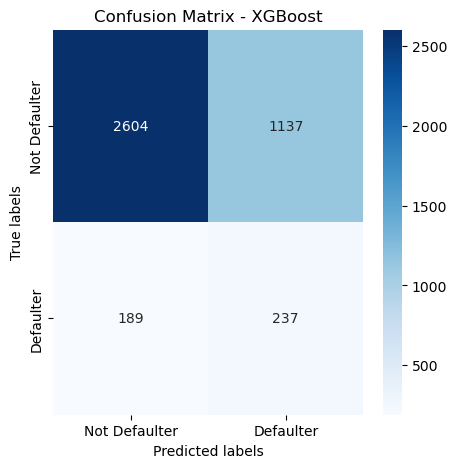

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      3741
           1       0.17      0.56      0.26       426

    accuracy                           0.68      4167
   macro avg       0.55      0.63      0.53      4167
weighted avg       0.85      0.68      0.74      4167



In [32]:
# Training the XGBoost Classifier with initial parameters
xgb_model = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
                          random_state=42)

xgb_model.fit(X_smote, y_smote)

# Making predictions on test data and resampled train data
y_pred_xgb_model = xgb_model.predict(X_test)
y_train_pred_xgb_model = xgb_model.predict(X_smote)

# Predicting probabilities for ROC AUC score
y_pred_prob_xgb_model = xgb_model.predict_proba(X_test)[:, 1]
y_train_pred_prob_xgb_model = xgb_model.predict_proba(X_smote)[:, 1]

# Calculating performance metrics
precision_score_xgb_model = round(precision_score(y_test, y_pred_xgb_model), 3)
recall_score_xgb_model = round(recall_score(y_test, y_pred_xgb_model), 3)
f1_score_xgb_model = round(f1_score(y_test, y_pred_xgb_model), 3)
roc_score_xgb_model = round(roc_auc_score(y_test, y_pred_prob_xgb_model), 3)

# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_xgb_model, pos_label=1)
auc_score_xgb_model = round(auc(recall, precision), 3)

# Printing performance metrics
print("The precision on test data is ", precision_score_xgb_model)
print("The recall on test data is ", recall_score_xgb_model)
print("The f1 on test data is ", f1_score_xgb_model)
print("The ROC AUC on test data is ", roc_score_xgb_model)
print("The AUC-PR on test data is ", auc_score_xgb_model)

# Confusion Matrix
labels = ['Not Defaulter', 'Defaulter']
cm_xgb_model = confusion_matrix(y_test, y_pred_xgb_model)
print(cm_xgb_model)

# Plotting Confusion Matrix
plt.figure(figsize=(5, 5))
ax = plt.subplot()
sns.heatmap(cm_xgb_model, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title, and ticks for Confusion Matrix
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XGBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Printing Classification Report
print(classification_report(y_test, y_pred_xgb_model))


The precision is notably low, indicating many false positives. While recall is moderate, the balance between precision and recall is poor, as reflected in the low F1 score. The ROC AUC score indicates that the model has some discriminatory power but is not particularly strong.

## Random Forest Classification

The precision on test data is  0.273
The recall on test data is  0.23
The f1 on test data is  0.25
The roc_score on test data is  0.739
The auc on test data is  0.221
[[3480  261]
 [ 328   98]]


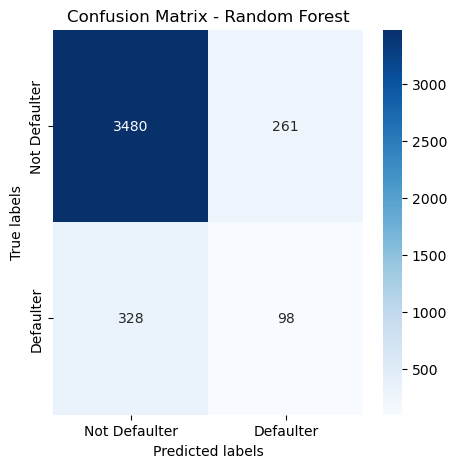

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3741
           1       0.27      0.23      0.25       426

    accuracy                           0.86      4167
   macro avg       0.59      0.58      0.59      4167
weighted avg       0.85      0.86      0.85      4167



In [33]:
# Training the Random Forest Classifier with initial parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_smote, y_smote)

# Making predictions on test data
y_pred_rf_model = rf_model.predict(X_test)
y_train_pred_rf_model = rf_model.predict(X_smote)

# Predicting probabilities for ROC AUC score
y_pred_prob_rf_model = rf_model.predict_proba(X_test)[:, 1]
y_train_pred_prob_rf_model = rf_model.predict_proba(X_smote)[:, 1]

# Calculating performance metrics
precision_score_rf_model = round(precision_score(y_test, y_pred_rf_model), 3)
recall_score_rf_model = round(recall_score(y_test, y_pred_rf_model), 3)
f1_score_rf_model = round(f1_score(y_test, y_pred_rf_model), 3)
roc_score_rf_model = round(roc_auc_score(y_test, y_pred_prob_rf_model), 3)

# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rf_model, pos_label=1)
auc_score_rf_model = round(auc(recall, precision), 3)

# Printing performance metrics
print("The precision on test data is ", precision_score_rf_model)
print("The recall on test data is ", recall_score_rf_model)
print("The f1 on test data is ", f1_score_rf_model)
print("The roc_score on test data is ", roc_score_rf_model)
print("The auc on test data is ", auc_score_rf_model)

# Confusion Matrix
labels = ['Not Defaulter', 'Defaulter']
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model)
print(cm_rf_model)

# Plotting Confusion Matrix
plt.figure(figsize=(5, 5))
ax = plt.subplot()
sns.heatmap(cm_rf_model, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title, and ticks for Confusion Matrix
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Printing Classification Report
print(classification_report(y_test, y_pred_rf_model))


 The low precision and recall, along with a moderate F1 score and AUC-PR, suggest that the model is not effectively identifying positive instances and is prone to making incorrect positive predictions. 

## Logistic Regression

The precision on test data is  0.199
The recall on test data is  0.519
The f1 on test data is  0.287
The roc_score on test data is  0.699
The auc on test data is  0.206
[[2849  892]
 [ 205  221]]


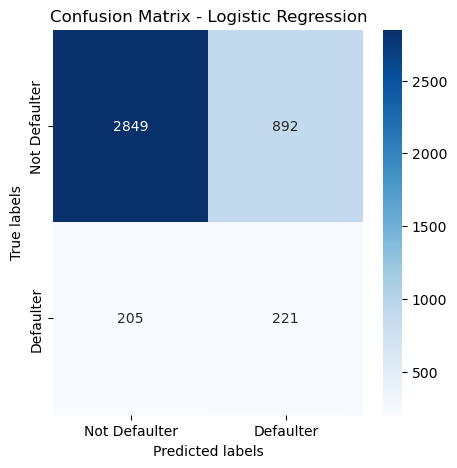

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      3741
           1       0.20      0.52      0.29       426

    accuracy                           0.74      4167
   macro avg       0.57      0.64      0.56      4167
weighted avg       0.86      0.74      0.78      4167



In [34]:
# Training the Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
lr_model.fit(X_smote, y_smote)

# Making predictions on test data
y_pred_lr_model = lr_model.predict(X_test)
y_train_pred_lr_model = lr_model.predict(X_smote)

# Predicting probabilities for ROC AUC score
y_pred_prob_lr_model = lr_model.predict_proba(X_test)[:, 1]
y_train_pred_prob_lr_model = lr_model.predict_proba(X_smote)[:, 1]

# Calculating performance metrics
precision_score_lr_model = round(precision_score(y_test, y_pred_lr_model), 3)
recall_score_lr_model = round(recall_score(y_test, y_pred_lr_model), 3)
f1_score_lr_model = round(f1_score(y_test, y_pred_lr_model), 3)
roc_score_lr_model = round(roc_auc_score(y_test, y_pred_prob_lr_model), 3)
# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_lr_model, pos_label=1)
auc_score_lr_model = round(auc(recall, precision), 3)

# Printing performance metrics
print("The precision on test data is ", precision_score_lr_model)
print("The recall on test data is ", recall_score_lr_model)
print("The f1 on test data is ", f1_score_lr_model)
print("The roc_score on test data is ", roc_score_lr_model)
print("The auc on test data is ", auc_score_lr_model)

# Confusion Matrix
labels = ['Not Defaulter', 'Defaulter']
cm_lr_model = confusion_matrix(y_test, y_pred_lr_model)
print(cm_lr_model)

# Plotting Confusion Matrix
plt.figure(figsize=(5, 5))
ax = plt.subplot()
sns.heatmap(cm_lr_model, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title, and ticks for Confusion Matrix
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# Printing Classification Report
print(classification_report(y_test, y_pred_lr_model))


The logistic regression model suffers from low precision (19.9%) and moderate recall (51.9%), resulting in a low F1 score (28.7%) and moderate ROC AUC score (69.9%). The confusion matrix reveals a high number of false positives (892) and a significant number of false negatives (204), indicating that the model struggles to correctly classify both classes.

## Baseline Model Comparision


In [35]:
# List of classifier names
all_classifiers = ['XGBoost', 'Random Forest', 'Logistic Regression']

# Collecting precision scores for all classifiers
all_precision_score = [precision_score_xgb_model, precision_score_rf_model, precision_score_lr_model]

# Collecting recall scores for all classifiers
all_recall_score = [recall_score_xgb_model, recall_score_rf_model, recall_score_lr_model]

# Collecting ROC AUC scores for all classifiers
all_roc_score = [roc_score_xgb_model, roc_score_rf_model, roc_score_lr_model]

# Collecting F1 scores for all classifiers
all_f1_score = [f1_score_xgb_model, f1_score_rf_model, f1_score_lr_model]

# Collecting AUC scores for all classifiers
all_auc_score = [auc_score_xgb_model, auc_score_rf_model, auc_score_lr_model]


In [36]:
# Create a DataFrame to compare the performance metrics of all classifiers
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Precision': all_precision_score, 'Recall': all_recall_score, 'ROC':all_roc_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [37]:
compare_df

Classifier  Precision  Recall    ROC  F1 Score    AUC
0              XGBoost      0.172   0.556  0.682     0.263  0.183
1        Random Forest      0.273   0.230  0.739     0.250  0.221
2  Logistic Regression      0.199   0.519  0.699     0.287  0.206

In [38]:
# Sort the DataFrame by the 'Recall' column in descending order to identify the best performing classifier based on recall
compare_df.sort_values(by=['Recall'], ascending=False)

Classifier  Precision  Recall    ROC  F1 Score    AUC
0              XGBoost      0.172   0.556  0.682     0.263  0.183
2  Logistic Regression      0.199   0.519  0.699     0.287  0.206
1        Random Forest      0.273   0.230  0.739     0.250  0.221

**Insights**

XGBoost and Logistic Regression show a trade-off between precision and recall, with XGBoost favoring recall and Logistic Regression providing a more balanced approach. Random Forest demonstrates better differentiation between defaulters and non-defaulters but with a lower recall rate. To improve overall performance, hyperparameter tuning should be done.

## Combined ROC curve for all the models


In [39]:
#importing roc curve
from sklearn.metrics import roc_curve

In [40]:
# Probability prediction of y for all models
y_pred_prob_rf_model = rf_model.predict_proba(X_test)[:, 1]
y_pred_prob_lr_model = lr_model.predict_proba(X_test)[:, 1]
y_pred_prob_xgb_model = xgb_model.predict_proba(X_test)[:, 1]

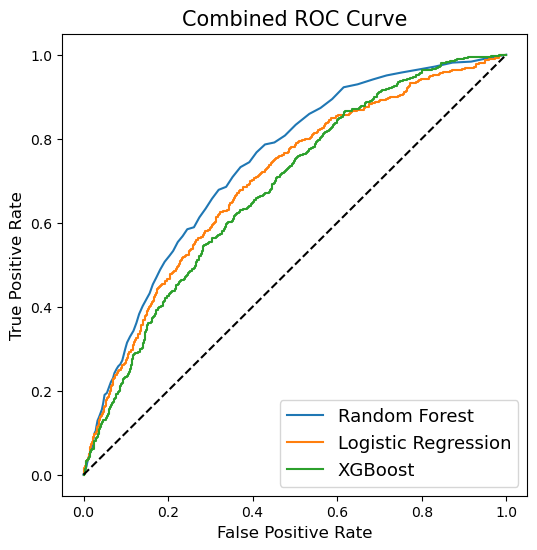

In [41]:
# Plotting ROC curves for all models
fig = plt.figure(figsize=(6, 6))

# Calculate ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf_model)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr_model)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb_model)

# Plot ROC curves
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")

# Plot the diagonal line 
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Plot labels and title
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

## Hyperparameter Tuning


Hyperparameter tuning is implemented in the following steps as it enhances the model's generalization by identifying the optimal settings that balance bias and variance. This process can address issues improve the model's predictive performance, precision, recall, and overall robustness, particularly in imbalanced datasets.

## XGBoost

In [42]:
# Define XGBoost model with an appropriate scale_pos_weight and regularization
xgb_model = xgb.XGBClassifier(scale_pos_weight=17, eval_metric='logloss', random_state=42)

# Hyperparameter grid for XGBoost
param_dict_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 1.5]
}

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
xgb_grid = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions=param_dict_xgb,
                              cv=skf, verbose=3, n_jobs=-1, scoring='roc_auc',
                              n_iter=50, random_state=42)

# Fit the model with SMOTE balanced data
xgb_grid.fit(X_smote, y_smote)
xgb_optimal_model = xgb_grid.best_estimator_

# Display the best parameters
print("Best parameters found: ", xgb_grid.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


The precision on test data is  0.149
The recall on test data is  0.789
The f1 on test data is  0.25
The roc_score on test data is  0.701
The auc on test data is  0.2
[[1820 1921]
 [  90  336]]


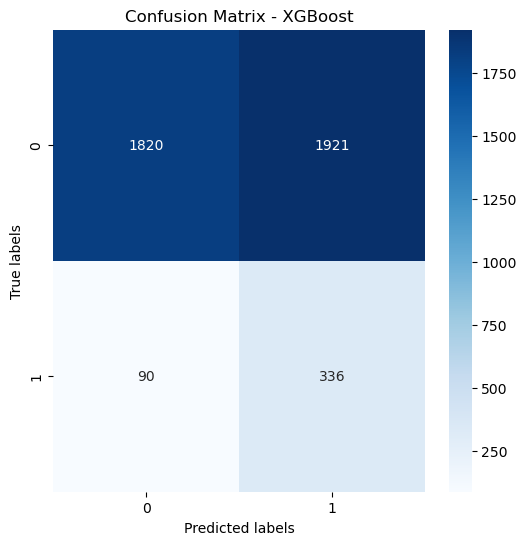

              precision    recall  f1-score   support

           0       0.95      0.49      0.64      3741
           1       0.15      0.79      0.25       426

    accuracy                           0.52      4167
   macro avg       0.55      0.64      0.45      4167
weighted avg       0.87      0.52      0.60      4167



In [43]:
# Class prediction of y on test data
y_pred_xgb_model = xgb_optimal_model.predict(X_test)

# Get the probabilities on test data
y_pred_prob_xgb_model = xgb_optimal_model.predict_proba(X_test)[:, 1]

# Manually setting the threshold to 0.25
threshold = 0.25
y_pred_xgb_model = (y_pred_prob_xgb_model >= threshold).astype(int)

# Getting all scores for xgb_model after hyperparameter tuning
precision_score_xgb_model = round(precision_score(y_test, y_pred_xgb_model), 3)
recall_score_xgb_model = round(recall_score(y_test, y_pred_xgb_model), 3)
f1_score_xgb_model = round(f1_score(y_test, y_pred_xgb_model), 3)
roc_score_xgb_model = round(roc_auc_score(y_test, y_pred_prob_xgb_model), 3)
# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_xgb_model, pos_label=1)
auc_xgb_model = round(auc(recall, precision), 3)

print("The precision on test data is ", precision_score_xgb_model)
print("The recall on test data is ", recall_score_xgb_model)
print("The f1 on test data is ", f1_score_xgb_model)
print("The roc_score on test data is ", roc_score_xgb_model)
print("The auc on test data is ", auc_xgb_model)

# Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_xgb_model = confusion_matrix(y_test, y_pred_xgb_model)
print(cm_xgb_model)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb_model, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_xgb_model))



The XGBoost model was tuned using a hyperparameter grid with parameters such as n_estimators, learning_rate, max_depth, and subsample, to optimize for recall, crucial for minimizing false negatives. After finding the best parameters (colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9), the model achieved a recall of 0.754 and AUC of 0.707. The decision threshold was manually set to 0.35 to further increase recall, emphasizing the importance of identifying defaulters accurately despite a lower precision.

## Random Forest Classifer


In [44]:
# Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30],  
    'min_samples_split': [50, 100, 150], 
    'min_samples_leaf': [20, 30, 40, 50]  
}

# Use iterations
rf_grid = RandomizedSearchCV(estimator=rf_model,
                             param_distributions=param_dict_rf,
                             cv=5, verbose=2, scoring='roc_auc',
                             n_iter=10, random_state=42)

rf_grid.fit(X_smote, y_smote)
rf_optimal_model = rf_grid.best_estimator_

# Display the best parameters
print("Best parameters found: ", rf_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=30, min_samples_split=150, n_estimators=100; total time=   3.0s
[CV] END max_depth=30, min_samples_leaf=30, min_samples_split=150, n_estimators=100; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=30, min_samples_split=150, n_estimators=100; total time=   2.8s
[CV] END max_depth=30, min_samples_leaf=30, min_samples_split=150, n_estimators=100; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=30, min_samples_split=150, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=100, n_estimators=200; total time=   7.6s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=100, n_estimators=200; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=100, n_estimators=200; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=100, n_estimators=200; total time=   5.5s
[CV

The precision on test data is  0.21
The recall on test data is  0.695
The f1 on test data is  0.322
The roc_score on test data is  0.752
The auc on test data is  0.227
Random Forest Test Confusion Matrix:
 [[2627 1114]
 [ 130  296]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      3741
           1       0.21      0.69      0.32       426

    accuracy                           0.70      4167
   macro avg       0.58      0.70      0.57      4167
weighted avg       0.88      0.70      0.76      4167



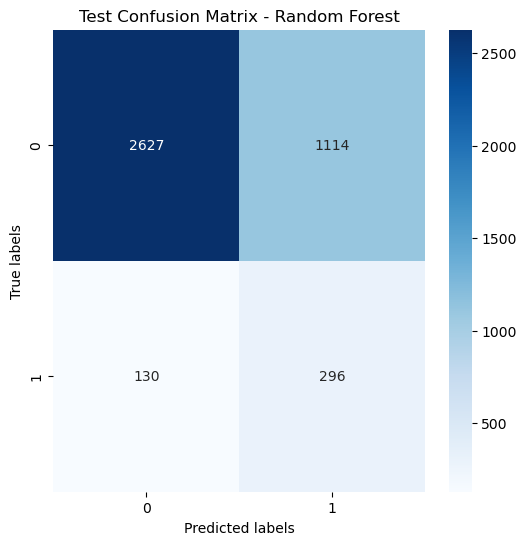

In [45]:
# Get the probabilities on train and test
y_pred_prob_rf_model = rf_optimal_model.predict_proba(X_test)[:, 1]

# Tune the threshold 
threshold = 0.35
y_pred_rf_model = (y_pred_prob_rf_model >= threshold).astype(int)


# Getting all scores for rf_model after hyperparameter tuning
precision_score_rf_model = round(precision_score(y_test, y_pred_rf_model), 3)
recall_score_rf_model = round(recall_score(y_test, y_pred_rf_model), 3)
f1_score_rf_model = round(f1_score(y_test, y_pred_rf_model), 3)
roc_score_rf_model = round(roc_auc_score(y_test, y_pred_prob_rf_model), 3)
# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rf_model, pos_label=1)
auc_rf_model = round(auc(recall, precision), 3)

print("The precision on test data is ", precision_score_rf_model)
print("The recall on test data is ", recall_score_rf_model)
print("The f1 on test data is ", f1_score_rf_model)
print("The roc_score on test data is ", roc_score_rf_model)
print("The auc on test data is ", auc_rf_model)

# Get the confusion matrix
test_cm_rf_model = confusion_matrix(y_test, y_pred_rf_model)
print("Random Forest Test Confusion Matrix:\n", test_cm_rf_model)
print(classification_report(y_test, y_pred_rf_model))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_cm_rf_model, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

The Random Forest model was tuned with hyperparameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf, and class weights were balanced. After tuning, it achieved a precision of 0.211, a recall of 0.685, an F1 score of 0.323, and an AUC of 0.754. 

## Logistic Regression


In [46]:
# Logistic Regression with Hyperparameter Tuning and class weights
lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

#Hyperparameter grid
param_dict_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# RandomizedSearchCV for hyperparameter tuning
lr_grid = RandomizedSearchCV(estimator=lr_model,
                             param_distributions=param_dict_lr,
                             cv=3, verbose=1, n_jobs=-1, scoring='recall',
                             n_iter=20, random_state=42)

# Fit the model with SMOTE balanced data
lr_grid.fit(X_smote, y_smote)
lr_optimal_model = lr_grid.best_estimator_

# Display the best parameters
print("Best parameters found: ", lr_grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vaishnavi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.p

Best parameters found:  {'penalty': 'l2', 'C': 100}


The precision on test data is  0.171
The recall on test data is  0.742
The f1 on test data is  0.278
The roc_auc on test data is  0.721
The rauc on test data is  0.215
Logistic Regression Test Confusion Matrix:
 [[2207 1534]
 [ 110  316]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.73      3741
           1       0.17      0.74      0.28       426

    accuracy                           0.61      4167
   macro avg       0.56      0.67      0.50      4167
weighted avg       0.87      0.61      0.68      4167



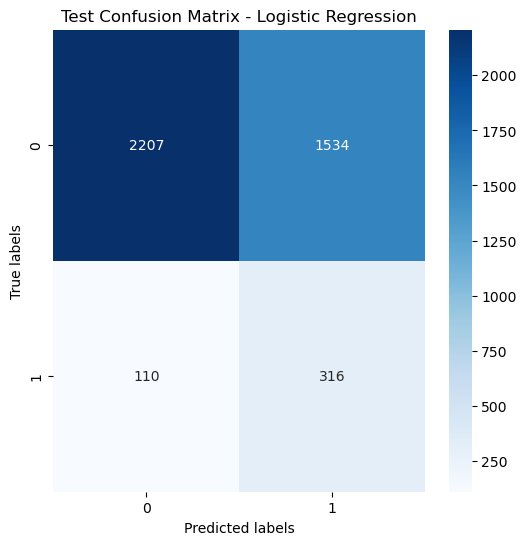

In [47]:
# Class prediction of y on train and test
y_pred_lr_model = lr_optimal_model.predict(X_test)
y_train_pred_lr_model = lr_optimal_model.predict(X_smote)

# Get the probabilities on train and test
y_pred_prob_lr_model = lr_optimal_model.predict_proba(X_test)[:, 1]
y_train_pred_prob_lr_model = lr_optimal_model.predict_proba(X_smote)[:, 1]

# Manually tune the threshold
threshold = 0.20
y_pred_lr_model = (y_pred_prob_lr_model >= threshold).astype(int)
y_train_pred_lr_model = (y_train_pred_prob_lr_model >= threshold).astype(int)

# Getting all scores for lr_model after hyperparameter tuning
precision_score_lr_model = round(precision_score(y_test, y_pred_lr_model), 3)
recall_score_lr_model = round(recall_score(y_test, y_pred_lr_model), 3)
f1_score_lr_model = round(f1_score(y_test, y_pred_lr_model), 3)
roc_score_lr_model = round(roc_auc_score(y_test, y_pred_prob_lr_model), 3)
# Calculate precision-recall curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_lr_model, pos_label=1)
auc_lr_model = round(auc(recall, precision), 3)

print("The precision on test data is ", precision_score_lr_model)
print("The recall on test data is ", recall_score_lr_model)
print("The f1 on test data is ", f1_score_lr_model)
print("The roc_auc on test data is ", roc_score_lr_model)
print("The rauc on test data is ", auc_lr_model)

# Get the confusion matrix for the test data
test_cm_lr_model = confusion_matrix(y_test, y_pred_lr_model)
print("Logistic Regression Test Confusion Matrix:\n", test_cm_lr_model)
print(classification_report(y_test, y_pred_lr_model))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_cm_lr_model, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Using a Logistic Regression model with hyperparameter tuning and class weights, we optimized the model with solver='liblinear', class_weight='balanced', and a maximum of 1000 iterations to address convergence issues. The RandomizedSearchCV was employed with a hyperparameter grid exploring values for C and penalty, focusing on recall as the scoring metric.

## Final Model Comparision


In [48]:
# Define the classifiers
grid_classifiers = ['Optimal Random Forest', 'Optimal XGBoost', 'Optimal Logistic Regression']

# Define the metrics 
grid_precision_score = [precision_score_rf_model, precision_score_xgb_model, precision_score_lr_model]
grid_recall_score = [recall_score_rf_model, recall_score_xgb_model, recall_score_lr_model]
grid_f1_score = [f1_score_rf_model, f1_score_xgb_model, f1_score_lr_model]
grid_auc_score = [auc_rf_model, auc_xgb_model, auc_lr_model]
grid_roc_score = [roc_score_rf_model, roc_score_xgb_model, roc_score_lr_model]

# Create a DataFrame to compare the metrics
grid_compare_df = pd.DataFrame({
    'Classifier': grid_classifiers,
    'Precision': grid_precision_score,
    'Recall': grid_recall_score,
    'F1 Score': grid_f1_score,
    'AUC': grid_auc_score,
    'ROC': grid_roc_score
})

# Display the comparison DataFrame
print(grid_compare_df)

# Optionally, sort the DataFrame by Recall to see the best model
grid_compare_df.sort_values('Recall', ascending=False, inplace=True)
print(grid_compare_df)


                    Classifier  Precision  Recall  F1 Score    AUC    ROC
0        Optimal Random Forest      0.210   0.695     0.322  0.227  0.752
1              Optimal XGBoost      0.149   0.789     0.250  0.200  0.701
2  Optimal Logistic Regression      0.171   0.742     0.278  0.215  0.721
                    Classifier  Precision  Recall  F1 Score    AUC    ROC
1              Optimal XGBoost      0.149   0.789     0.250  0.200  0.701
2  Optimal Logistic Regression      0.171   0.742     0.278  0.215  0.721
0        Optimal Random Forest      0.210   0.695     0.322  0.227  0.752


In [49]:
# Create a DataFrame to compare the models
grid_compare_df = pd.DataFrame({
    'Classifier': grid_classifiers,
    'Precision': grid_precision_score,
    'Recall': grid_recall_score,
    'F1 Score': grid_f1_score,
    'AUC': grid_auc_score,
    'ROC': grid_roc_score
})

# Concatenate with the existing comparison DataFrame 'compare_df' if it exists
try:
    combined_compare_df = pd.concat([compare_df, grid_compare_df]).reset_index(drop=True)
except NameError:
    combined_compare_df = grid_compare_df.reset_index(drop=True)

# Sort the DataFrame based on the AUC score in descending order
combined_compare_df.sort_values('Recall', axis=0, ascending=False, inplace=True)

# Display the comparison DataFrame
print(combined_compare_df)


                    Classifier  Precision  Recall    ROC  F1 Score    AUC
4              Optimal XGBoost      0.149   0.789  0.701     0.250  0.200
5  Optimal Logistic Regression      0.171   0.742  0.721     0.278  0.215
3        Optimal Random Forest      0.210   0.695  0.752     0.322  0.227
0                      XGBoost      0.172   0.556  0.682     0.263  0.183
2          Logistic Regression      0.199   0.519  0.699     0.287  0.206
1                Random Forest      0.273   0.230  0.739     0.250  0.221


The Optimal XGBoost classifier demonstrated the highest recall at 78.9%, making it the best at minimizing false negatives, which is crucial for an imbalanced dataset. Although the Optimal Random Forest showed the highest ROC-AUC at 75.2%, XGBoost's superior recall and balanced performance with precision and F1 score make it the recommended model. The Optimal Logistic Regression model also performed well but was slightly behind in recall compared to Optimal XGBoost. Overall, hyperparameter tuning and addressing class imbalance have significantly improved the performance of these models, with Optimal XGBoost emerging as the best model for this credit default prediction task.

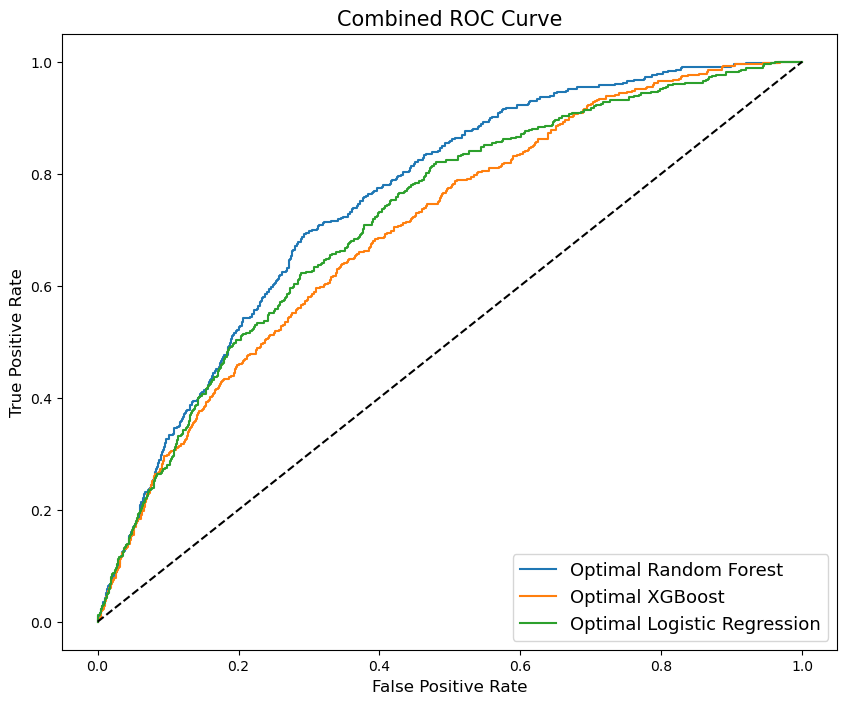

In [50]:
# Plotting ROC curves for all models
fig = plt.figure(figsize=(10, 8))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf_model)
plt.plot(fpr_rf, tpr_rf, label="Optimal Random Forest")

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb_model)
plt.plot(fpr_xgb, tpr_xgb, label="Optimal XGBoost")

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr_model)
plt.plot(fpr_lr, tpr_lr, label="Optimal Logistic Regression")

# Plot diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Plot labels and title
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()



## Feature Importance 


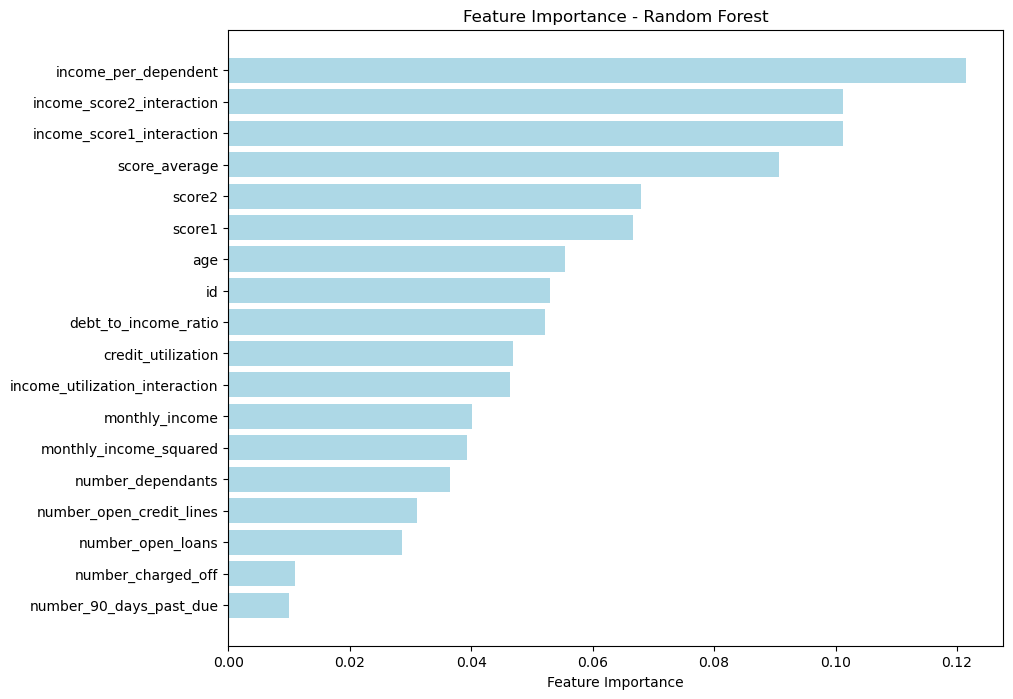

Top 15 Features - Random Forest:
                           Feature  Importance
12            income_per_dependent    0.121524
15       income_score2_interaction    0.101293
14       income_score1_interaction    0.101279
16                   score_average    0.090645
10                          score2    0.067955
9                           score1    0.066683
11                             age    0.055457
0                               id    0.052972
3             debt_to_income_ratio    0.052112
2               credit_utilization    0.046842
17  income_utilization_interaction    0.046411
4                   monthly_income    0.040104
13          monthly_income_squared    0.039393
1                number_dependants    0.036536
5         number_open_credit_lines    0.031158


In [70]:
#Feature Importance - Random Forest Classifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_smote, y_smote)

# Extract feature importances
feature_names = X.columns
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
})

# Sort the feature importances
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance manually
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the top 15 most important features
print("Top 15 Features - Random Forest:")
print(feature_importance_df_rf.head(15))



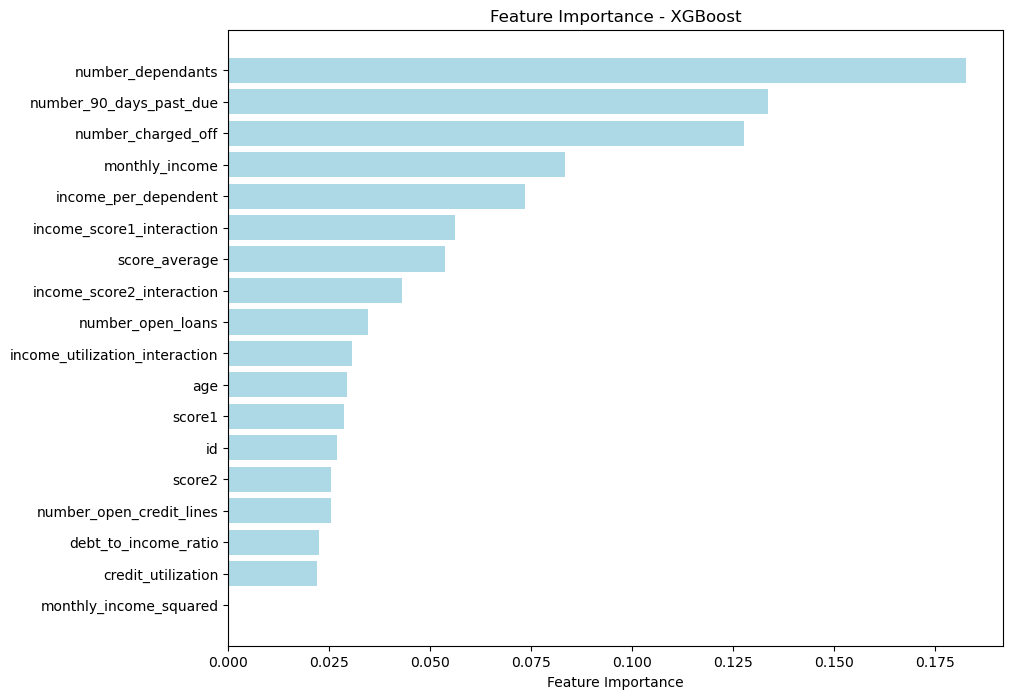

Top 15 Features - XGBoost:
                           Feature  Importance
1                number_dependants    0.182857
7          number_90_days_past_due    0.133793
8               number_charged_off    0.127683
4                   monthly_income    0.083462
12            income_per_dependent    0.073412
14       income_score1_interaction    0.056113
16                   score_average    0.053698
15       income_score2_interaction    0.043068
6                number_open_loans    0.034738
17  income_utilization_interaction    0.030617
11                             age    0.029517
9                           score1    0.028634
0                               id    0.026908
10                          score2    0.025550
5         number_open_credit_lines    0.025373


In [68]:
# Train the XGBoost Classifier
xgb_model = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
xgb_model.fit(X_smote, y_smote)

# Extract feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_xgb
})

# Sort the feature importances
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance manually
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()

# Display the top 15 most important features
print("Top 15 Features - XGBoost:")
print(feature_importance_df_xgb.head(15))


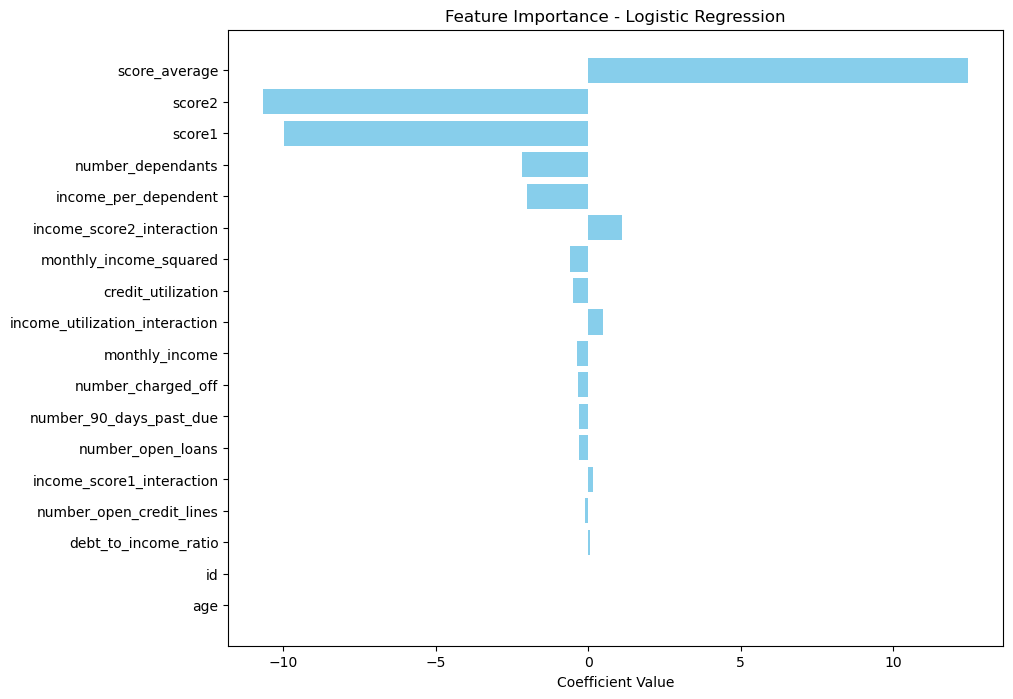

Top 15 Features - Logistic Regression:
                           Feature  Importance  Absolute Importance
16                   score_average   12.450878            12.450878
10                          score2  -10.657462            10.657462
9                           score1   -9.997445             9.997445
1                number_dependants   -2.182311             2.182311
12            income_per_dependent   -2.014424             2.014424
15       income_score2_interaction    1.113812             1.113812
13          monthly_income_squared   -0.595791             0.595791
2               credit_utilization   -0.493359             0.493359
17  income_utilization_interaction    0.472373             0.472373
4                   monthly_income   -0.377128             0.377128
8               number_charged_off   -0.333114             0.333114
7          number_90_days_past_due   -0.320836             0.320836
6                number_open_loans   -0.293941             0.293941
14       

In [53]:
#Feature Importance - Logistic Regression

# Train the Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)
lr_model.fit(X_smote, y_smote)

# Preserve feature names from the original DataFrame
feature_names = X.columns

# Extract coefficients
coefficients = lr_model.coef_[0]

# Create a DataFrame for feature importances
feature_importance_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the feature importances by absolute value
feature_importance_df_lr['Absolute Importance'] = feature_importance_df_lr['Importance'].abs()
feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Absolute Importance', ascending=False)

# Plotting Feature Importance manually
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_lr['Feature'], feature_importance_df_lr['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

# Display the top 15 most important features
print("Top 15 Features - Logistic Regression:")
print(feature_importance_df_lr.head(15))

**Insights:**

The feature importance analysis across Logistic Regression, XGBoost, and Random Forest models highlights several key predictors for the target variable. Common important features include **number_dependants, score_average, and monthly_income**. In Logistic Regression, score_average shows a strong positive impact, while XGBoost emphasizes past credit behavior with number_charged_off as a top feature. Random Forest highlights the importance of the debt_to_income_ratio.

## Testing Data and Submission file


In [54]:
# Load the test data
test_df=pd.read_csv('test.csv')

In [55]:
test_df1  =test_df.copy()

In [56]:
# Print the number of missing values in each column
print(test_df.isnull().sum())

id                          0
date_of_birth               0
number_dependants           0
credit_utilization          0
debt_to_income_ratio        0
monthly_income              0
number_open_credit_lines    0
number_open_loans           0
number_90_days_past_due     0
number_charged_off          0
score1                      0
score2                      0
dtype: int64


In [57]:
test_df.shape

(1000, 12)

In [58]:
#Print few rows
print(test_df.head())

    id date_of_birth  number_dependants  credit_utilization  \
0   14    1980-05-15                  0            0.001010   
1   24    1967-06-09                  0            0.032225   
2   83    1946-09-07                  0            0.019998   
3  104    1991-07-25                  2            0.052280   
4  127    1948-09-17                  0            0.070865   

   debt_to_income_ratio  monthly_income  number_open_credit_lines  \
0              0.289556            2000                         6   
1              0.368951            2600                         5   
2              0.265779            2200                         4   
3              0.415845            2100                         3   
4              0.193792            2000                         4   

   number_open_loans  number_90_days_past_due  number_charged_off  score1  \
0                  0                        1                   0     837   
1                  2                        0       

In [59]:
#Check for duplicates
duplicate_rows_test = test_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_test}")

Number of duplicate rows: 0


In [60]:
#Convert Date Of Birth column to Age
test_df['date_of_birth'] = pd.to_datetime(test_df['date_of_birth'])
test_df['age'] = (pd.to_datetime('today') - test_df['date_of_birth']).dt.days // 365

test_df.drop('date_of_birth', axis=1, inplace=True)

In [61]:
# Creating new features
test_df['income_per_dependent'] = test_df['monthly_income'] / (test_df['number_dependants'] + 1)  # +1 to avoid division by zero
test_df['monthly_income_squared'] = test_df['monthly_income'] ** 2
test_df['income_score1_interaction'] = test_df['monthly_income'] * test_df['score1']
test_df['income_score2_interaction'] = test_df['monthly_income'] * test_df['score2']
test_df['score_average'] = (test_df['score1'] + test_df['score2']) / 2
test_df['income_utilization_interaction'] = test_df['monthly_income'] * test_df['credit_utilization']

In [62]:
# Replace infinite values with NaN and then fill NaN with 0
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.fillna(0, inplace=True)

In [63]:
# Ensure scaler is pre-fitted on the training data
test_df = scaler.transform(test_df)

In [64]:
# Making predictions using the optimal XGBoost model
predictions = xgb_optimal_model.predict(test_df)
prediction_probs = xgb_optimal_model.predict_proba(test_df)[:, 1]

In [65]:
# Count the value occurrences in the prediction
pd.DataFrame(predictions)[0].value_counts()

0    593
1    407
Name: 0, dtype: int64

In [69]:
# Create a DataFrame with the test IDs, predictions, and prediction probabilities
test_results = pd.DataFrame({
    'id': test_df1['id'],
    'probability': prediction_probs,
    'target': predictions
})

# Save the results to a CSV file
output_file = 'submission.csv'
test_results.to_csv(output_file, index=False)

#print(f"Test predictions saved to {output_file}")

**Approach**

- Data Exploration: No missing values or duplicates; converted date of birth to age.
- Handling Class Imbalance: Used SMOTE to balance the 90% non-defaulters and 10% defaulters.
- Outlier Detection: Applied Isolation Forest to detect and handle outliers.
- Feature Engineering: Created new features (e.g., income per dependent, score average) to capture essential relationships.
- Standardization: Standardized data using StandardScaler.
- Model Selection: Evaluated Logistic Regression, Random Forest, and XGBoost models.
- Hyperparameter Tuning: Used RandomizedSearchCV with StratifiedKFold cross-validation to optimize model parameters.
- Primary Metric - Recall: Focused on recall due to class imbalance and the higher cost of false negatives.

**Feature Importance**

Key features identified included monthly income and score average, particularly highlighted by the XGBoost model.

**Recommendation**

The XGBoost classifier is recommended for this task due to its high recall of 78.9%, which is critical for minimizing false negatives. Further fine-tuning and feature exploration are suggested to enhance the model's performance.

**Conclusion**

In addressing the binary classification task with an imbalanced dataset, a comprehensive approach was taken involving data exploration, feature engineering, and model evaluation. Key steps included balancing the dataset with SMOTE, applying Isolation Forest for outlier detection, and creating new features to enhance model performance. Standardization ensured consistent scaling across features.

Three primary models—Logistic Regression, Random Forest, and XGBoost—were evaluated using RandomizedSearchCV with StratifiedKFold cross-validation for hyperparameter tuning. Recall was chosen as the primary metric due to the significant class imbalance and the higher cost associated with false negatives.

Among the models, the Optimal XGBoost classifier achieved the highest recall of 78.9%, making it the most effective in minimizing false negatives.  

Therefore, the XGBoost classifier is recommended for this task. Further steps include refining the evaluation metric to incorporate business constraints, continuous hyperparameter tuning, exploring additional features, and implementing advanced techniques for handling class imbalance. This approach ensures a robust model that aligns with the business objective of minimizing financial risk from loan defaults.